<b> FINAL PROJECT 
    ( BY: GROUP 10
              1. Priyanshi Kathuria 18csu161
              2. Rashi Kapoor 18csu168
              3. Ritik Chadha 18csu174 )

# DengAI: Predicting Disease Spread
<I> HOSTED BY DRIVENDATA

<b> PROBLEM STATEMENT - 
    Using environmental data collected by various U.S. Federal Government agencies—Your task is to predict how the number of dengue cases each week (in each location) are based on environmental variables describing changes in temperature, precipitation, vegetation, and more.

# PROBLEM DESCRIPTION

There are two cities, San Juan and Iquitos, with data for each city spanning 5 and 3 years respectively. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. 

# FEATURES OF DATASET

# TECHNIQUES APPLIED

1. Data cleaning and pre-processing
2. Exploratory Data Analysis
3. Regression Techniques (Linear Regression & Logistic Regression)
4. Classification Techniques (Decision Tree, Naive Bayes, KNN )
5. Clustering techniques (K-Means and Hierarchical)
6. Feature Selection techniques ( 6.1 Filter methods- 
                                     6.1.1 Fisher Score
                                     6.1.2 Univariate feature selection
                                     6.1.3 Information Gain
                                 
                              6.2 Wrapper Methods - 
                              
                                    6.2.1 Step Forward Feature Selection
                                    6.2.2 Exhaustive Feature Selection)


# IMPORTING LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [249]:
df1 = pd.read_csv('dengue_features_train.csv')
df2 =  pd.read_csv ('dengue_labels_train.csv')

In [250]:
df3 = pd.merge(df1, df2)
df3

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


### How many rows and columns ?

In [9]:
df3.shape

(1456, 25)

### Description of dataset

In [12]:
df3.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


# DATA PREPROCESSING

### Checking the percentage of missing data contains in all the columns

In [14]:
missing_percentage = df3.isnull().sum()/df3.shape[0]
print(missing_percentage)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.133242
ndvi_nw                                  0.035714
ndvi_se                                  0.015110
ndvi_sw                                  0.015110
precipitation_amt_mm                     0.008929
reanalysis_air_temp_k                    0.006868
reanalysis_avg_temp_k                    0.006868
reanalysis_dew_point_temp_k              0.006868
reanalysis_max_air_temp_k                0.006868
reanalysis_min_air_temp_k                0.006868
reanalysis_precip_amt_kg_per_m2          0.006868
reanalysis_relative_humidity_percent     0.006868
reanalysis_sat_precip_amt_mm             0.008929
reanalysis_specific_humidity_g_per_kg    0.006868
reanalysis_tdtr_k                        0.006868
station_avg_temp_c                       0.029533


### Checking for null values

In [15]:
df3.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

### Dropping the null values

In [16]:
df4 = df3.dropna()

In [17]:
df4.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

<b> All the null values are successfully dropped!

# VISUALIZING DATASET

C:\Users\rashi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:404: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


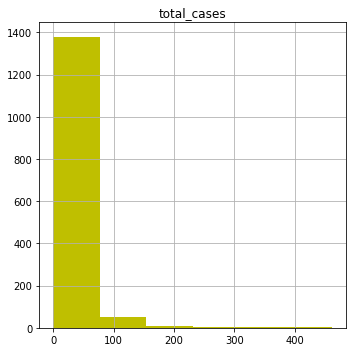

In [259]:
df3[['total_cases']].hist(figsize=(5,5),bins=6,color='Y')
plt.tight_layout()
plt.show()

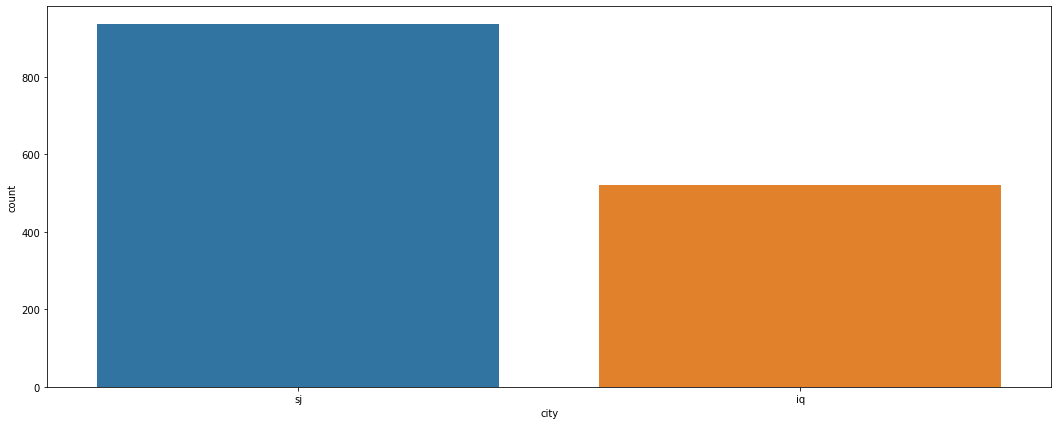

In [261]:
sns.countplot(x='city', data= df3)

In [253]:
df3['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

### Plotting a pie chart to number of dengue cases in the 2 cities

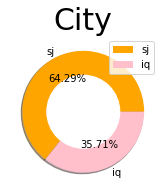

In [254]:
size = [936, 520]
colors = ['orange', 'pink']
labels = "sj", "iq"
explode = [0, 0,]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('City', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

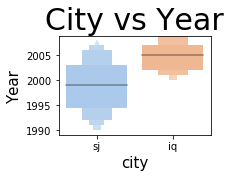

In [255]:
plt.subplot(2, 2, 2)
sns.boxenplot(data['city'], data['year'], palette = 'pastel')
plt.title('City vs Year', fontsize = 30)
plt.xlabel('city', fontsize = 15)
plt.ylabel('Year', fontsize = 15)

plt.show()

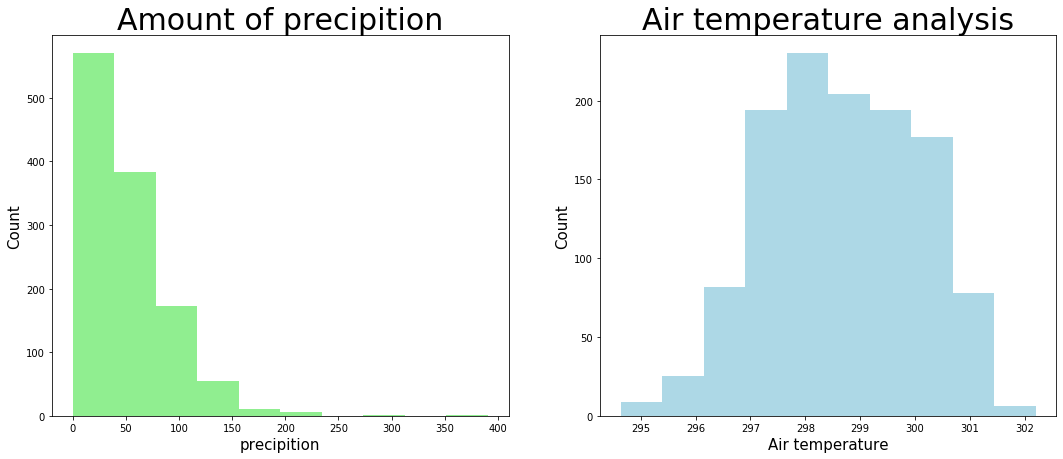

In [257]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['precipitation_amt_mm'], color = 'lightgreen')
plt.title('Amount of precipition',fontsize = 30)
plt.xlabel('precipition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(data['reanalysis_air_temp_k'], color = 'lightblue')
plt.title('Air temperature analysis',fontsize = 30)
plt.xlabel('Air temperature', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### HEATMAP

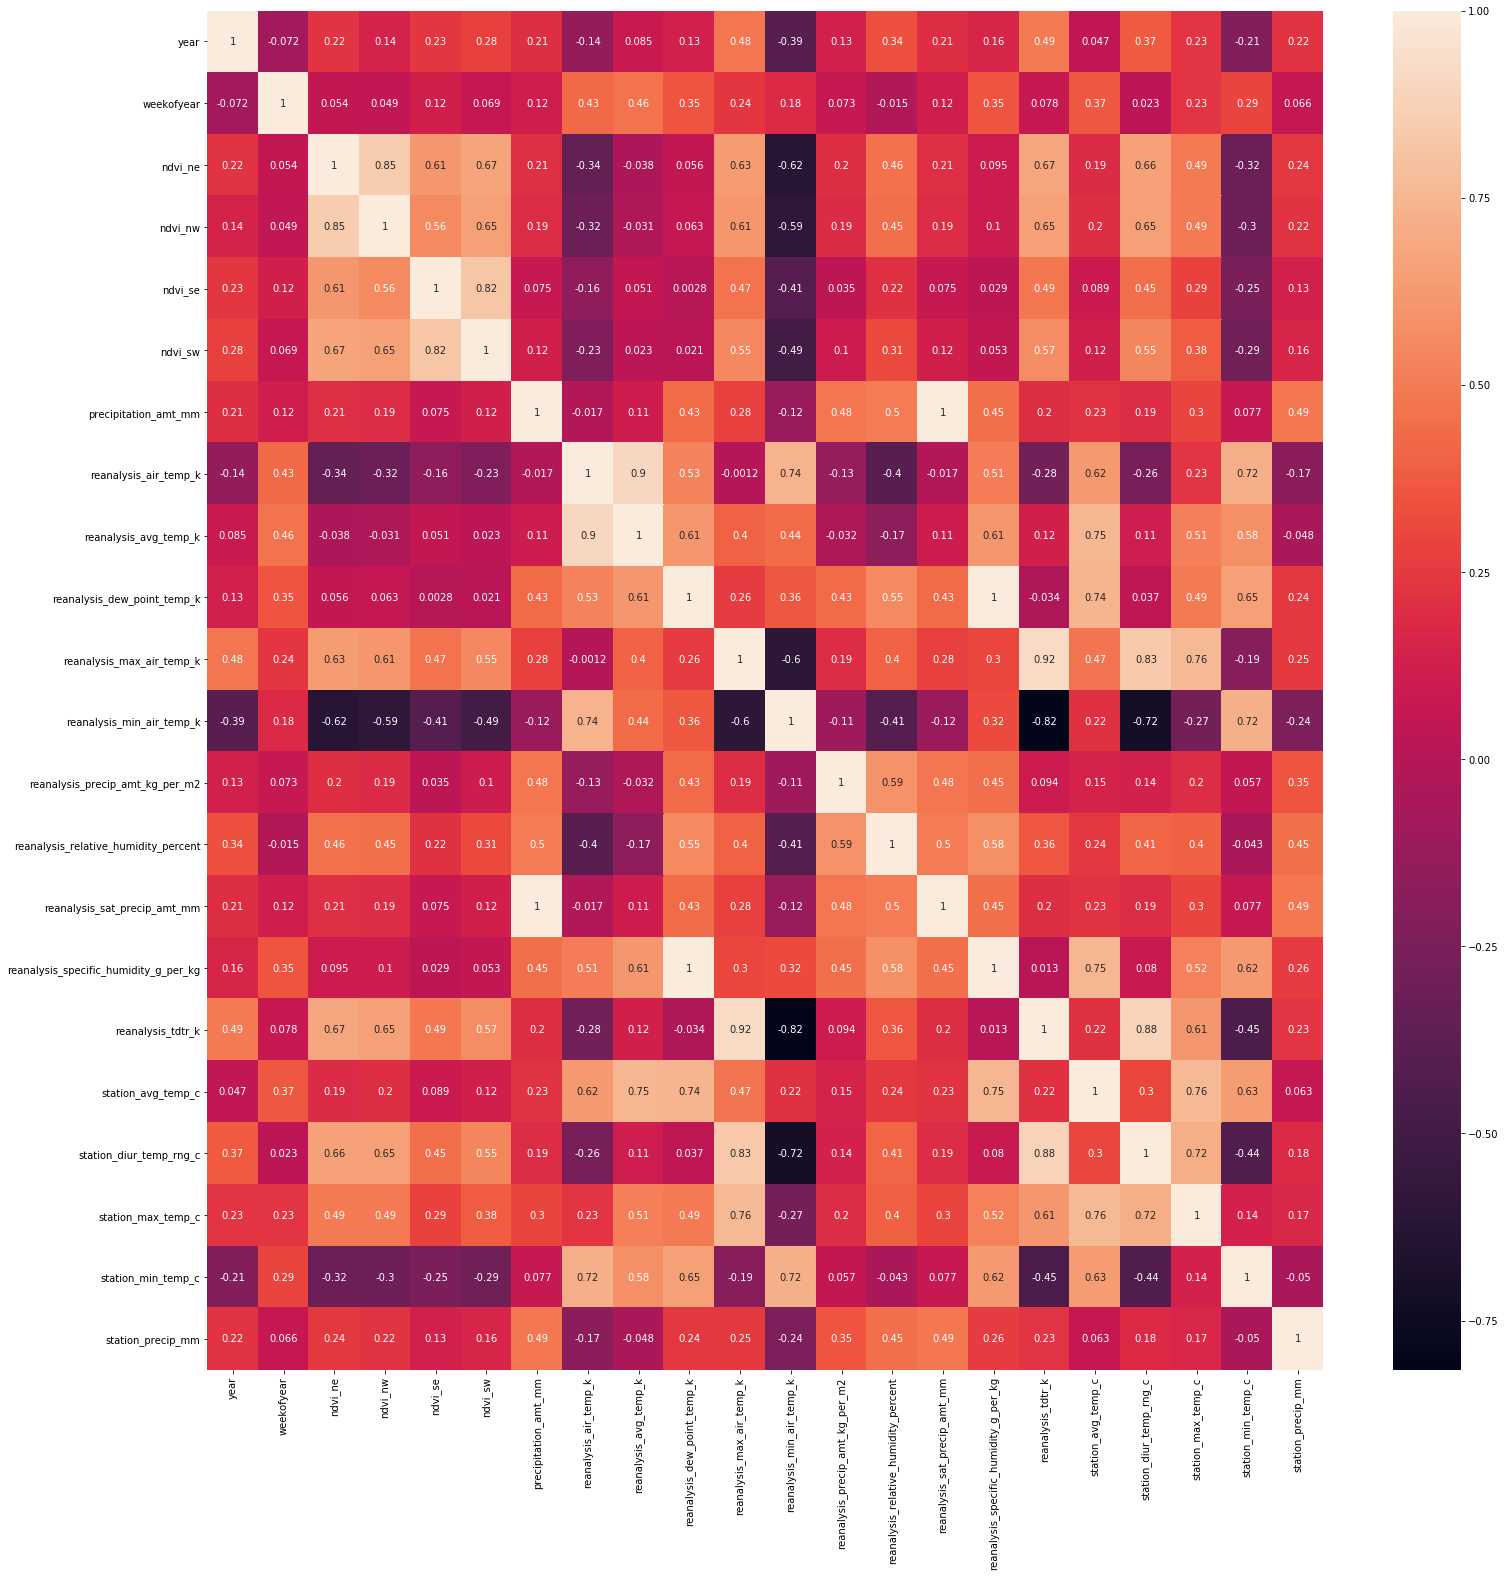

In [258]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

# REGRESSION TECHNIQUES

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x).
Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

# 1) APPLYING LINEAR REGRESSION

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

In [18]:
X = pd.DataFrame(df4.iloc[:,24])
Y = pd.DataFrame(df4.iloc[:,13])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('coefficent(b1):' , regressor.coef_)

print('intercept(b0):' , regressor.intercept_)

coefficent(b1): [[0.03467024]]
intercept(b0): [294.8646946]


In [21]:
Y_pred = regressor.predict(X_test)

In [23]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
print("mean absolute error:",np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
a=" {}".format(r2_score(Y_test,Y_pred))

mean squared error: 5.6497712788240575
r2 score: 0.16515704666796416
mean absolute error: 1.3812917079331772


This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.


Text(0, 0.5, 'MinimumTemp')

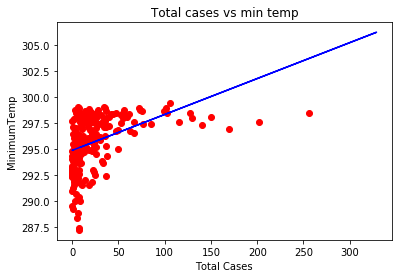

In [27]:
print("This graph shows the blue line as the regression line and the red dots depict the data points.We can see that most of the points are close to the regression line which shows that the model has fit on the data correctly.")
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Total cases vs min temp")
plt.xlabel("Total Cases")
plt.ylabel("MinimumTemp")

In [28]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=Y_train, cv=10)
accuracies

array([0.08630615, 0.19420739, 0.12281919, 0.1668317 , 0.1837148 ,
       0.18490419, 0.14360245, 0.14060268, 0.08778415, 0.22204025])

In [29]:
accuracies.mean()

0.15328129229710394

In [30]:
accuracies.std()

0.04297728681208406

# 2) APPLYING LOGISTIC REGRESSION

In [58]:
df = pd.read_csv ('dengue_labels_train.csv')
df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [59]:
training_set= df.replace(to_replace =["sj","iq"],value =["0","1"])

In [60]:
training_set.drop(['weekofyear'],axis=1,inplace=True)

In [61]:
training_set

,city,year,total_cases
0,0,1990,4
1,0,1990,5
2,0,1990,4
3,0,1990,3
4,0,1990,6
...,...,...,...
1451,1,2010,5
1452,1,2010,8
1453,1,2010,1
1454,1,2010,1


In [62]:
X = training_set.drop('city',axis=1).values
y = training_set['city'].values

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train

array([[ 1.47386864, -0.52029838],
       [ 1.10394057, -0.54324414],
       [ 0.36408443, -0.40556955],
       ...,
       [ 0.7340125 , -0.2449492 ],
       [-0.00584364, -0.1761119 ],
       [ 0.36408443, -0.2449492 ]])

In [67]:
y_train

array(['1', '1', '0', ..., '1', '0', '0'], dtype=object)

In [68]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['1', '1', '0', ..., '1', '0', '0'], dtype=object)

In [70]:
y_train

array(['1', '1', '0', ..., '1', '0', '0'], dtype=object)

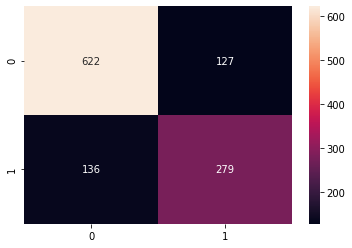

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [72]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0

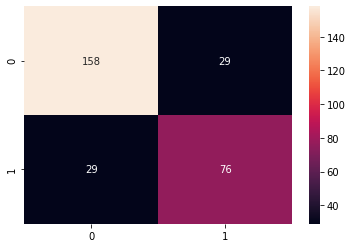

In [73]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [74]:
from sklearn import metrics
print("Accuracy:" , metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.8013698630136986


In [75]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

In [76]:
y_train.shape

(1164,)

In [77]:
X_train.shape

(1164, 2)

(-1.5661899083055428, 11.003810091694469)

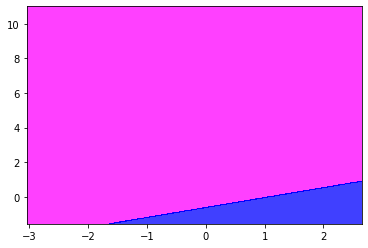

In [78]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
#If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


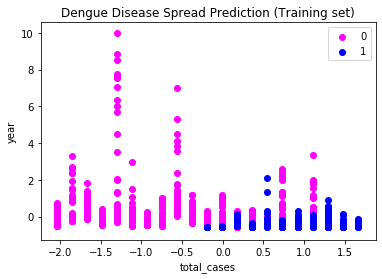

In [79]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Dengue Disease Spread Prediction (Training set)')
plt.xlabel('total_cases')
plt.ylabel('year')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


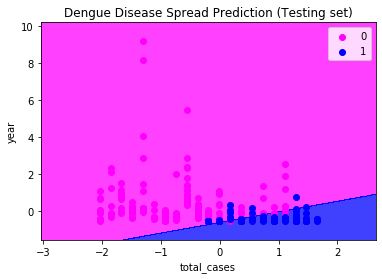

In [80]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Dengue Disease Spread Prediction (Testing set)')
plt.xlabel('total_cases')
plt.ylabel('year')
plt.legend()
plt.show()

After applying various Regression techniques, The accuracies came out to be :
1. Linear Regression :- 15%
2. Logistic Regression : - 80%

<b> Logistic regression gave us great results whereas Linear regression does not seem to be a suitable method to carry out regression analysis for our dataset

# CLASSIFICATION TECHNIQUES

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. 

# 1. DECISION TREE CLASSIFICATION

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [81]:
training_set= df4.replace(to_replace =["sj","iq"],value =["0","1"])

In [82]:
training_set

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,1,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,1,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,1,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [83]:
training_set["city"] = training_set["city"].astype(str).astype(int)
print(training_set.dtypes)

city                                       int32
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [84]:
X = training_set.iloc[:, [13,24]].values
y = training_set.iloc[:, 0].values

In [85]:
X

array([[295.9,   4. ],
       [296.4,   5. ],
       [297.3,   4. ],
       ...,
       [292.4,   1. ],
       [291.9,   1. ],
       [292.3,   4. ]])

In [86]:
Y

,reanalysis_min_air_temp_k
0,295.9
1,296.4
2,297.3
3,297.0
4,297.5
...,...
1451,294.5
1452,291.9
1453,292.4
1454,291.9


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [92]:
cm

array([[179,   4],
       [ 13, 104]], dtype=int64)

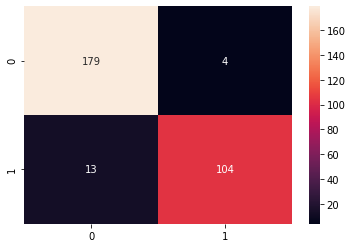

In [93]:
sns.heatmap(cm, annot=True, fmt="d")

In [94]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9433333333333334


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       183
           1       0.96      0.89      0.92       117

    accuracy                           0.94       300
   macro avg       0.95      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


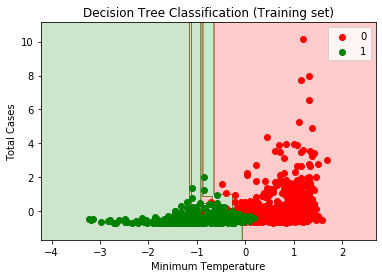

In [96]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


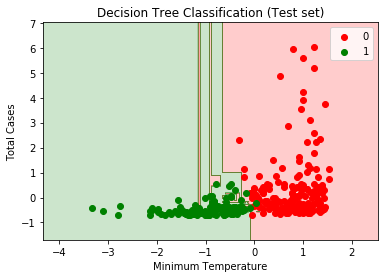

In [97]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# 2. NAIVE BAYES CLASSIFICATION

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [98]:
X = training_set.iloc[:, [13,24]].values
y = training_set.iloc[:, 0].values

In [99]:
X

array([[295.9,   4. ],
       [296.4,   5. ],
       [297.3,   4. ],
       ...,
       [292.4,   1. ],
       [291.9,   1. ],
       [292.3,   4. ]])

In [100]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[161,  13],
       [  5, 121]], dtype=int64)

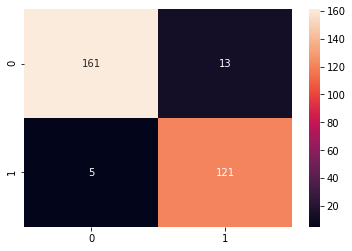

In [106]:
sns.heatmap(cm, annot=True, fmt="d")

In [107]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


In [108]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       174
           1       0.90      0.96      0.93       126

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


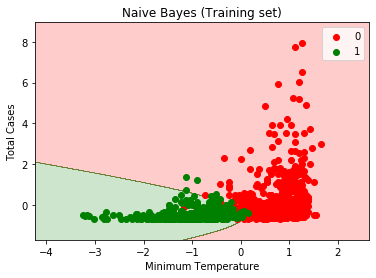

In [109]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


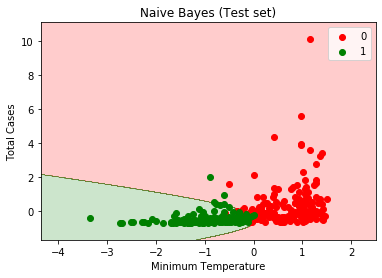

In [110]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# 3. K NEAREST NEIGHBOUR CLASSIFICATION

An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 

In [112]:
X = training_set.iloc[:, [13,24]].values
y = training_set.iloc[:, 0].values

In [113]:
X

array([[295.9,   4. ],
       [296.4,   5. ],
       [297.3,   4. ],
       ...,
       [292.4,   1. ],
       [291.9,   1. ],
       [292.3,   4. ]])

In [115]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_pred = classifier.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[184,  11],
       [  6,  99]], dtype=int64)

In [126]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9433333333333334


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       195
           1       0.90      0.94      0.92       105

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


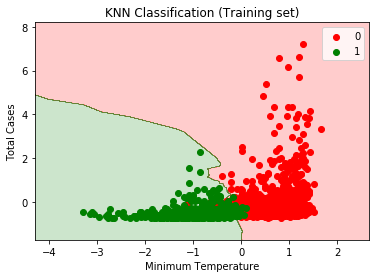

In [128]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


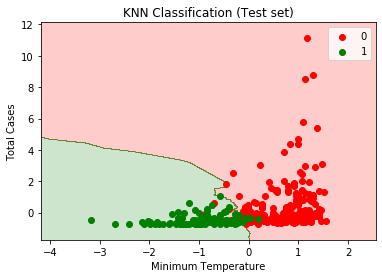

In [129]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Minimum Temperature')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

After applying various classification techniques, The accuracies came out to be :
1. Decision Tree  :- 93%
2. Naive Bayes : - 92%
3. KNN :- 93%
<b> All the classification techniques gives great results and are suitable for the dataset.

# CLUSTERING

In [130]:
df = pd.read_csv('dengue_features_train.csv')

In [131]:
df.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [132]:
Df = df.dropna()

In [136]:
Df.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

# APPLYING KMEANS CLUSTERING 

In [137]:
from sklearn.cluster import KMeans

In [138]:
X=Df.drop(['city','year', 'weekofyear','week_start_date'],axis=1,inplace=True)

C:\Users\rashi\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
Df

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Df)

In [141]:
X

array([[-0.12220735, -0.25384606, -0.09513954, ..., -1.62579955,
        -1.33694106, -0.50873538],
       [ 0.21551343,  0.06473244, -0.58053566, ..., -0.4458776 ,
         0.08021109, -0.65982966],
       [-0.76730404,  0.3198579 , -0.6498271 , ..., -0.18937283,
         0.46670713,  0.00988552],
       ...,
       [ 0.76641315,  0.09689769,  0.60184329, ..., -0.18937283,
        -1.85226912, -0.68433144],
       [ 1.38657133,  0.92308318,  0.98515711, ..., -0.70238238,
        -0.69278099, -0.50873538],
       [ 1.13147004,  0.81702844,  0.9223916 , ...,  0.58014149,
         0.08021109, -0.41889554]])

In [142]:
X = df.iloc[:, [1, 2]].values

# ELBOW METHOD

<B>In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.</B>

<B>Elbow Method - To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:
When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.
There’s a point where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.</B>

<B>The quality of the cluster assignments is determined by computing the sum of the squared error (SSE/Inertia) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.</B>

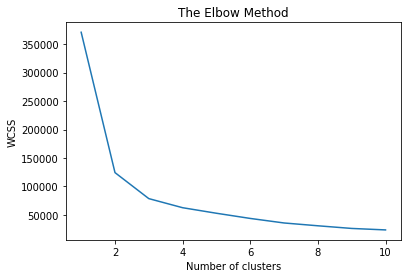

In [143]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [145]:
kmeans.inertia_

78726.27702011201

In [146]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [147]:
kmeans.inertia_

52994.39474249175

# SILHOUETTE COEFFICIENT

<B>The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.</B>

In [148]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

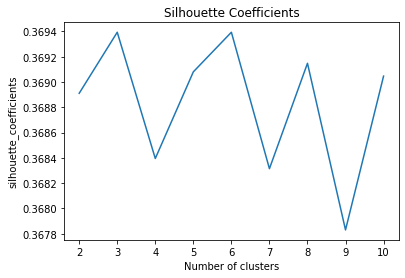

In [149]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [150]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [151]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [152]:
kmeans_silhouette

0.4400337728804267

In [153]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [154]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [155]:
kmeans_silhouette

0.3700287941062773

In [156]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [157]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [158]:
kmeans_silhouette

0.37999682723942885

In [159]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [160]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [161]:
kmeans_silhouette

0.37538852345968887

<B>As observed with k = 4,6 & 8 the silhouette score reduces hence we can claim that k = 3 gives optimal clusters. </B>

# Davies-Bouldin index 

In [162]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [163]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
print(davies_bouldin_score(X,labels))

0.7889467567231262


In [164]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [165]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
print(davies_bouldin_score(X,labels))

0.8727986589229842


<B>The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering.<B/>

As K = 3 gives us optimum results, we will choose k = 3 for our clustering techniques

# APPLYING K-MEANS CLUSTERING

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [167]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

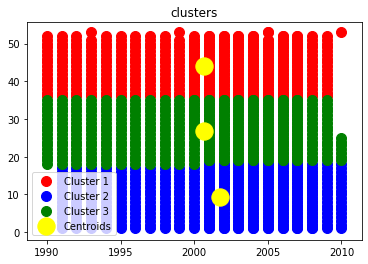

In [168]:
# Visualising the clusters (only for 2D clustering)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('clusters')
plt.legend()
plt.show()

# APPLYING HEIRACHICAL CLUSTERING

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

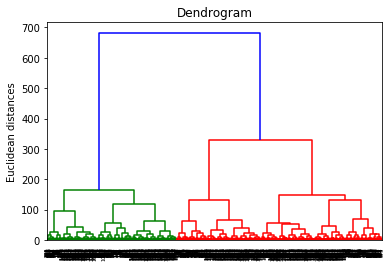

In [169]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

In [170]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

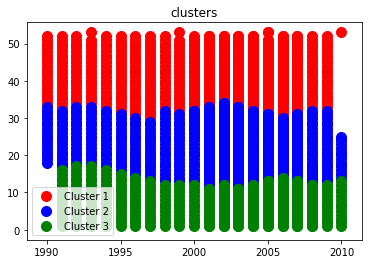

In [171]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

# FEATURE SELECTION TECHNIQUE

# 1. FILTER METHODS

# Fisher score 

In [172]:
df = pd.read_csv('dengue_features_train.csv')

In [173]:
Df = df.dropna()

In [174]:
X=Df.drop(labels=['city'],axis=1)
y=Df['city']

In [175]:
data = Df.groupby(Df.city)

In [176]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [177]:
df1 = data.get_group('sj')
df2 = data.get_group('iq')

In [178]:
df1_mean = df1.mean()
df2_mean = df2.mean()

In [179]:
df1_var = df1.var()
df2_var = df2.var()

In [180]:
def fisher(x,y):
    return abs(((np.mean(df1) - np.mean(df2))**2)/(np.var(df1) + np.var(df2)))

In [181]:
score=fisher(df1,df2).to_frame(name="Fisher Score")
score=score.sort_values(by="Fisher Score",ascending = False)

In [182]:
score

,Fisher Score
reanalysis_tdtr_k,7.278418
station_diur_temp_rng_c,4.722687
reanalysis_min_air_temp_k,4.508610
reanalysis_max_air_temp_k,4.425120
ndvi_ne,2.344026
ndvi_nw,2.021496
reanalysis_relative_humidity_percent,1.623371
station_max_temp_c,1.252543
year,1.010614
ndvi_sw,0.964986


In [183]:
#top 10 features by using fisher score
score.head(10)

,Fisher Score
reanalysis_tdtr_k,7.278418
station_diur_temp_rng_c,4.722687
reanalysis_min_air_temp_k,4.508610
reanalysis_max_air_temp_k,4.425120
ndvi_ne,2.344026
ndvi_nw,2.021496
reanalysis_relative_humidity_percent,1.623371
station_max_temp_c,1.252543
year,1.010614
ndvi_sw,0.964986


In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [185]:
X_train_1=X_train[['reanalysis_tdtr_k','station_diur_temp_rng_c','reanalysis_min_air_temp_k','reanalysis_max_air_temp_k','ndvi_ne','ndvi_nw','reanalysis_relative_humidity_percent','station_max_temp_c','year','ndvi_sw']]
X_test_1 =X_test[['reanalysis_tdtr_k','station_diur_temp_rng_c','reanalysis_min_air_temp_k','reanalysis_max_air_temp_k','ndvi_ne','ndvi_nw','reanalysis_relative_humidity_percent','station_max_temp_c','year','ndvi_sw']]

In [186]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_1, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [187]:
y_pred=clf.predict(X_test_1)

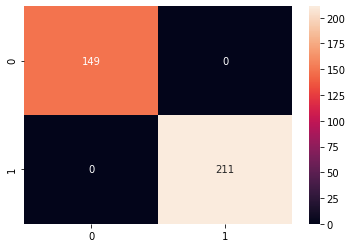

In [188]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [190]:
print("Accuracy Score:")
print("\n")
print(accuracy)
print("Classification Report:")
print("\n")
print(cr)

Accuracy Score:


1.0
Classification Report:


              precision    recall  f1-score   support

          iq       1.00      1.00      1.00       149
          sj       1.00      1.00      1.00       211

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



# Univariate feature selection

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [192]:
df = pd.read_csv ('dengue_features_train.csv')

In [193]:
data = df.dropna()

In [194]:
data1= data.replace(to_replace =["sj","iq"],value =["0","1"])

In [195]:
data1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [196]:
data1.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [197]:
data1["city"] = data1["city"].astype(str).astype(int)
print(data1.dtypes)

city                                       int32
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [198]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data1.select_dtypes(include=numerics).columns)
data2 = data1[numerical_vars]
data2.shape

(1199, 23)

In [199]:
data2

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [200]:
data2.dtypes

city                                       int32
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [201]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['city'], axis=1),
    data2['city'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((839, 22), (360, 22))

In [202]:
univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([3.70263976e+02, 2.45302507e-01, 8.82709415e+02, 8.03716429e+02,
        2.54489856e+02, 4.84460056e+02, 1.18588128e+02, 2.33062330e+02,
        2.11861064e+00, 1.81652845e+01, 1.96002145e+03, 1.93888711e+03,
        1.20276683e+02, 7.71088986e+02, 1.18588128e+02, 3.26808310e+01,
        3.60215601e+03, 3.01609915e+01, 2.06379144e+03, 4.29787225e+02,
        1.80200510e+02, 1.44965957e+02]),
 array([1.32524646e-068, 6.20532321e-001, 5.09840835e-133, 1.83632156e-124,
        3.19370090e-050, 4.53883354e-085, 6.41622702e-026, 1.32581409e-046,
        1.45893452e-001, 2.25565422e-005, 1.72130468e-221, 4.12192123e-220,
        3.04623617e-026, 8.30475994e-121, 6.41622702e-026, 1.51040798e-008,
        1.78270571e-305, 5.27597607e-008, 4.08893406e-228, 2.25572718e-077,
        2.37058621e-037, 6.62477682e-031]))

In [203]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

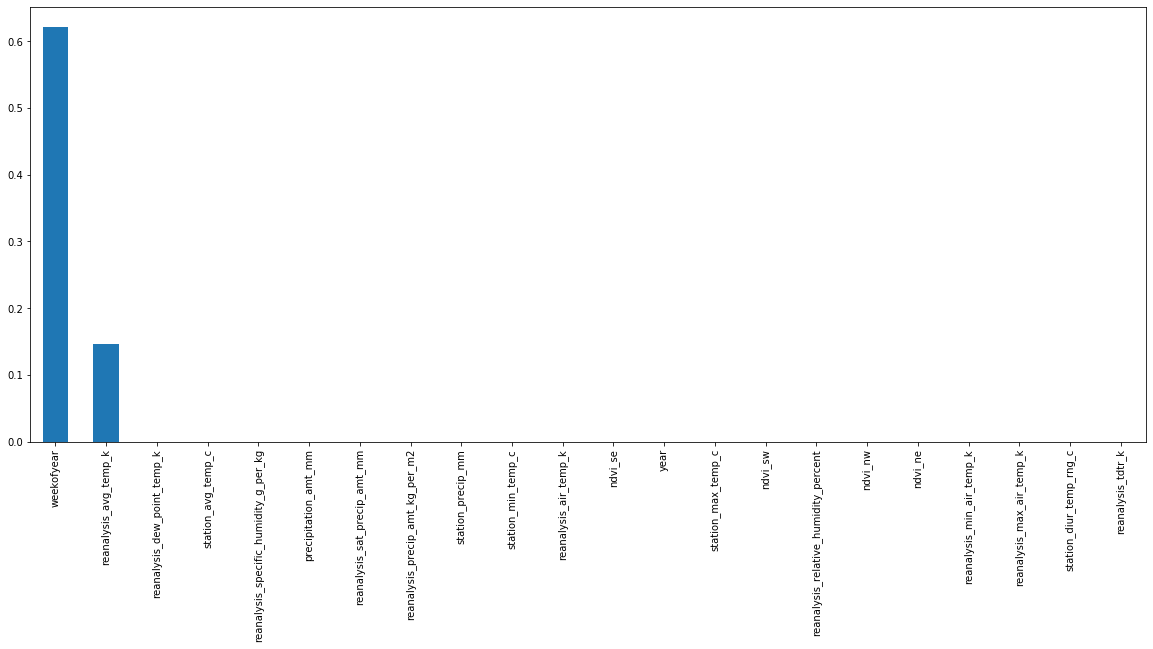

In [204]:
#plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [205]:
#the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['year', 'ndvi_ne', 'ndvi_nw', 'ndvi_sw', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_max_temp_c'],
      dtype='object')

In [206]:
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(839, 10)

In [207]:
X_test = sel_.transform(X_test.fillna(0))
X_test.shape

(360, 10)

In [208]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [209]:
y_pred=clf.predict(X_test)

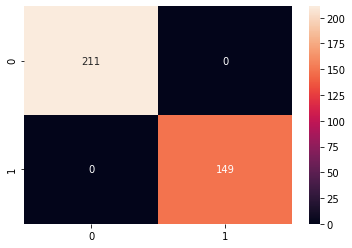

In [210]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [211]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [212]:
print("Accuracy Score:")
print(accuracy)
print("Classification Report:")
print("\n")
print(cr)

Accuracy Score:
1.0
Classification Report:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       149

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



# Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. 

In [213]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [214]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['city'], axis=1),
    data2['city'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((839, 22), (360, 22))

In [215]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.23210502, 0.        , 0.3875096 , 0.38194856, 0.16654477,
       0.23773574, 0.16142654, 0.12520896, 0.01525477, 0.02194799,
       0.55741148, 0.53545305, 0.08250179, 0.39000238, 0.16079234,
       0.01873252, 0.65833229, 0.13653027, 0.52610738, 0.48183546,
       0.48130716, 0.10966747])

In [216]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

reanalysis_tdtr_k                        0.658332
reanalysis_max_air_temp_k                0.557411
reanalysis_min_air_temp_k                0.535453
station_diur_temp_rng_c                  0.526107
station_max_temp_c                       0.481835
station_min_temp_c                       0.481307
reanalysis_relative_humidity_percent     0.390002
ndvi_ne                                  0.387510
ndvi_nw                                  0.381949
ndvi_sw                                  0.237736
year                                     0.232105
ndvi_se                                  0.166545
precipitation_amt_mm                     0.161427
reanalysis_sat_precip_amt_mm             0.160792
station_avg_temp_c                       0.136530
reanalysis_air_temp_k                    0.125209
station_precip_mm                        0.109667
reanalysis_precip_amt_kg_per_m2          0.082502
reanalysis_dew_point_temp_k              0.021948
reanalysis_specific_humidity_g_per_kg    0.018733


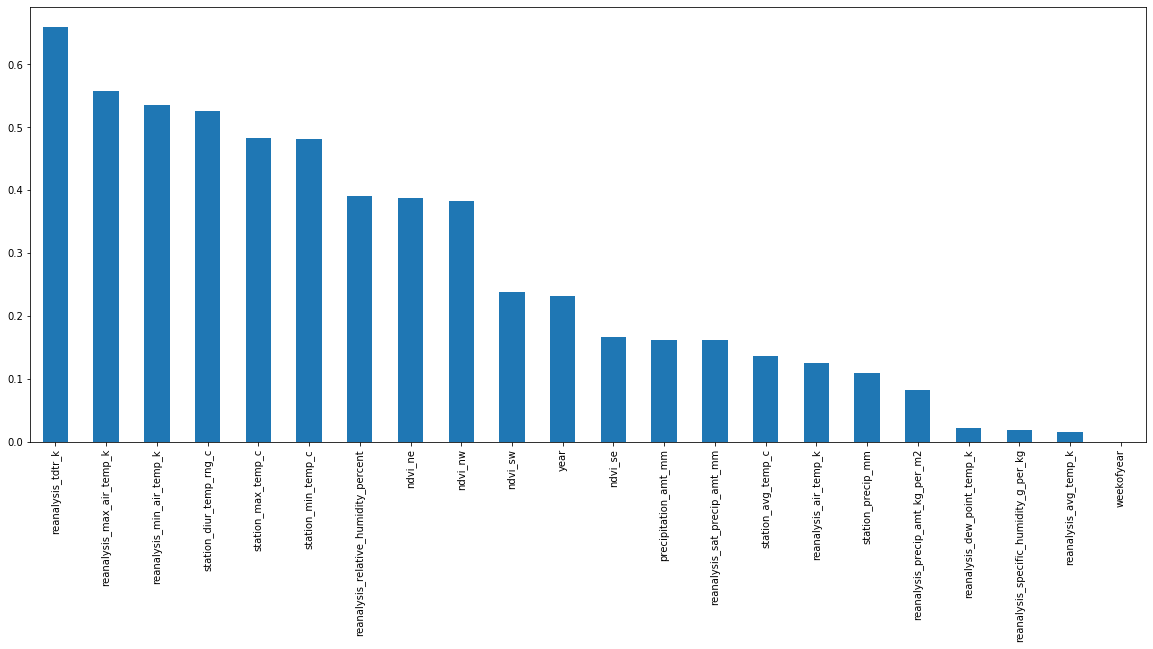

In [217]:
#plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [218]:
#the top 10 features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['year', 'ndvi_ne', 'ndvi_nw', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c'],
      dtype='object')

In [219]:
X_train_2=X_train[['year', 'ndvi_ne', 'ndvi_nw', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c']]
X_test_2=X_test[['year', 'ndvi_ne', 'ndvi_nw', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c']]

In [220]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_2, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [221]:
y_pred=clf.predict(X_test_2)

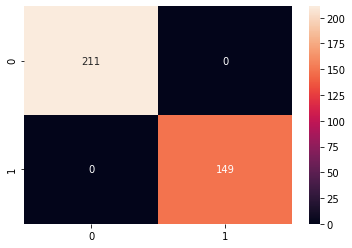

In [222]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [223]:
accuracy=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [224]:
print("Accuracy Score:")
print("\n")
print(accuracy)
print("Classification Report:")
print("\n")
print(cr)

Accuracy Score:


1.0
Classification Report:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       149

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



# 2. WRAPPER METHODS -

# Exhaustive feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all **15** feature combinations as follows:

- all possible combinations of 1 feature
- all possible combinations of 2 features
- all possible combinations of 3 features
- all the 4 features

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

Here I will use the Exhaustive feature selection algorithm from mlxtend in a classification 

In [230]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [231]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['city'], axis=1),
    data2['city'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((839, 22), (360, 22))

In [232]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(data2, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  7


In [233]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((839, 15), (360, 15))

In [234]:
X_train.columns[0:10]

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_se', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2'],
      dtype='object')

In [235]:
efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:4]].fillna(0)), y_train)

Features: 15/15

In [236]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [237]:
efs1.best_idx_

(0, 1, 2, 3)

In [238]:
selected_feat= X_train.columns[list(efs1.best_idx_)]
selected_feat

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_se'], dtype='object')

In [239]:
# evaluate performance of classifier using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9950680394556843
Test set
Random Forests roc-auc: 0.982473997264544


# Step forward feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification for example. 

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

I will use the Step Forward feature selection algorithm from mlxtend in a classification 

In [240]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [241]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['city'], axis=1),
    data2['city'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((839, 22), (360, 22))

In [242]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  7


In [243]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((839, 15), (360, 15))

In [244]:
%%time
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs1 = SFS(RandomForestClassifier(n_jobs=-1), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3,
           n_jobs=-1)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    5.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.8s finished

[2020-12-09 22:37:37] Features: 1/10 -- score: 0.9721022301915042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.4s finished

[2020-12-09 22:37:40] Features: 2/10 -- score: 0.99998205569911[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.3s finished

[2020-12-09 22:37:43] Features: 3/10 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.

Wall time: 31.2 s


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.7s finished

[2020-12-09 22:38:01] Features: 10/10 -- score: 1.0

In [245]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_se', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2'],
      dtype='object')

In [246]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [247]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 1.0


By Applying feature selection techniques,accuracy of our model is : <B>
1. Fisher Score=100%
2. Univariate feature selection= 100%
3. Mutual Information=100%
4. Exhaustive feature selection= 99%
5. Step forward feature selection= 100%

# Result

1. Linear Regression :- 15%
2. Logistic Regression : - 80%
3. Decision Tree classification  :- 93%
4. Naive Bayes classification : - 92%
5. KNN Classification :- 93%
6. K Means Clustering
7. Heirarchical Clustering
8. Fisher Score=100%
9. Univariate feature selection= 100%
10. Mutual Information=100%
11. Exhaustive feature selection= 99%
12. Step forward feature selection= 100%

<b> After applying various techniques of Machine Learning, we definitely saw improvements in the accuracies as we kept applying different techniques.  


Thank You!